In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

data = pd.read_csv("train.csv")
data = data.fillna(0)

y_train = pd.DataFrame(data['Price'], columns=['Price'])

data = data.drop(["Ecology_2", "Ecology_3", "Shops_2", "Price"], axis=1)

X_train = pd.DataFrame(data)

data = pd.read_csv("test.csv")

data = data.drop(["Ecology_2", "Ecology_3", "Shops_2"], axis=1)
data = data.fillna(0)

X_test = pd.DataFrame(data)

In [2]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = lr.predict(X_test)

In [27]:
y_train = y_train[:5000]
y_train.shape

(5000, 1)

In [28]:
y_pred.shape


(5000, 1)

In [29]:

initial_r2s = r2_score(y_train, y_pred)
initial_r2s

-0.43862337910399285

In [30]:
initial_mse = mean_squared_error(y_train, y_pred)
initial_mse

12577529055.728485

In [31]:
lr.intercept_

array([-8476.69615398])

In [32]:
lr.coef_

array([[ 2.62393624e-01,  3.91243266e+02,  3.32621300e+04,
         1.42736477e+03,  5.30022794e+00,  1.66492975e+01,
         1.91873205e+03,  9.99742738e+02,  3.14899373e-03,
        -4.52462873e+04,  1.29285292e+03, -1.43687767e+00,
         1.63684962e+01,  8.39975442e+00,  5.15526091e+03,
        -6.10651183e+02]])

In [33]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Признак')

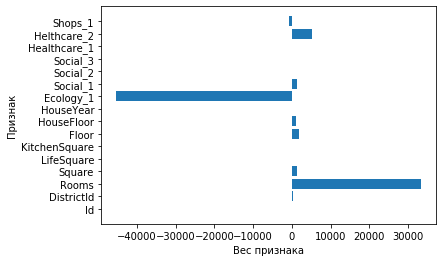

In [34]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [35]:
from sklearn.ensemble import RandomForestRegressor  
model = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=12, min_samples_split=2, 
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                              bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, 
                              warm_start=False)

In [38]:
model.fit(X_train[:5000], y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [39]:
y_pred = model.predict(X_test)

In [41]:
after_RFR_r2s = r2_score(y_train, y_pred)
after_RFR_r2s

-0.6716839446585483

In [42]:
after_RFR_mse = mean_squared_error(y_train, y_pred)
after_RFR_mse

14615120045.54865

In [47]:
df = pd.DataFrame(y_pred)
df.to_csv('Osipov_predictions.csv',index=True)